In [12]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
#LOAD DATA
df = pd.read_csv("rfm_features_transformed.csv")
print(df.head())


   Customer ID  Recency  Frequency  Monetary Value  Monetary Value_log  \
0      12346.0      326          1        77183.60           11.253955   
1      12347.0        2          7         4310.00            8.368925   
2      12348.0       75          4         1797.24            7.494564   
3      12349.0       19          1         1757.55            7.472245   
4      12350.0      310          1          334.40            5.815324   

   Frequency_log  
0       0.693147  
1       2.079442  
2       1.609438  
3       0.693147  
4       0.693147  


In [3]:
# FEATRUE SELECTION
features = df[['Recency', 'Frequency_log', 'Monetary Value_log']]

In [4]:
#SCALE FEATURES
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
#CLUSTER VALIDATION
sse = []
silhouette = []
calinski = []
davies = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_features, labels))
    calinski.append(calinski_harabasz_score(scaled_features, labels))
    davies.append(davies_bouldin_score(scaled_features, labels))

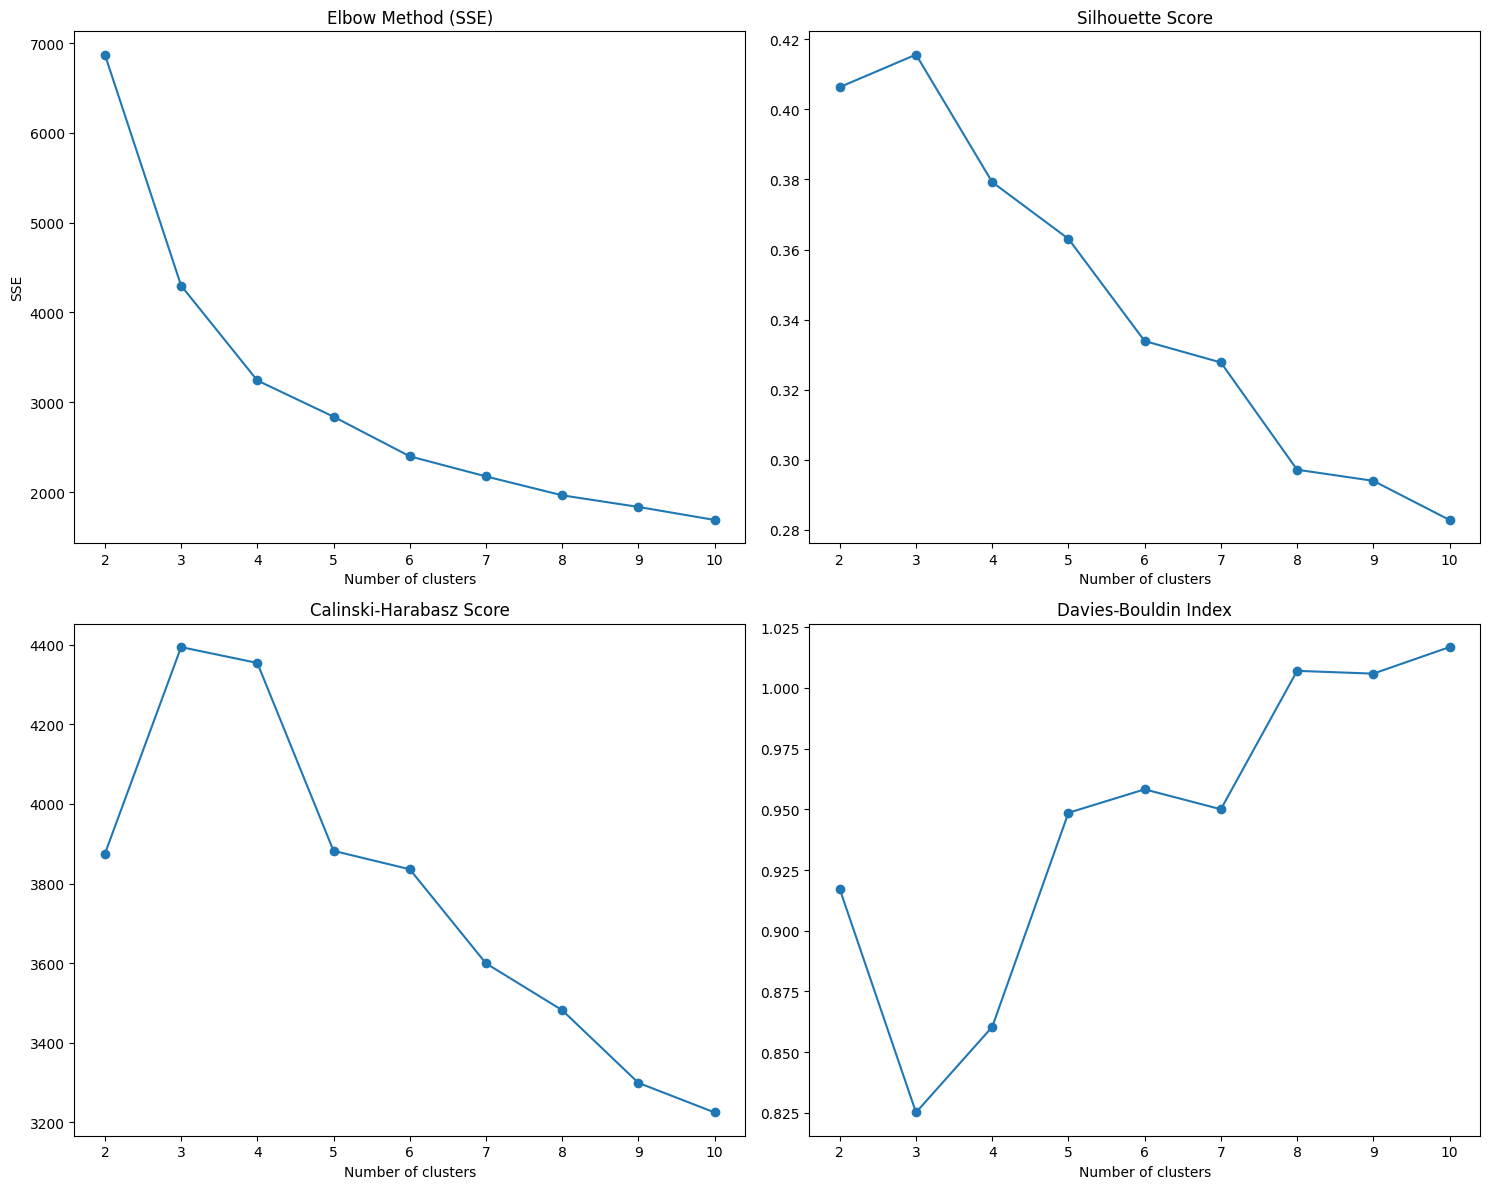

In [7]:
#PLOT METRICS
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].plot(K, sse, marker='o')
axes[0, 0].set_title('Elbow Method (SSE)')
axes[0, 0].set_xlabel('Number of clusters')
axes[0, 0].set_ylabel('SSE')

axes[0, 1].plot(K, silhouette, marker='o')
axes[0, 1].set_title('Silhouette Score')
axes[0, 1].set_xlabel('Number of clusters')

axes[1, 0].plot(K, calinski, marker='o')
axes[1, 0].set_title('Calinski-Harabasz Score')
axes[1, 0].set_xlabel('Number of clusters')

axes[1, 1].plot(K, davies, marker='o')
axes[1, 1].set_title('Davies-Bouldin Index')
axes[1, 1].set_xlabel('Number of clusters')

plt.tight_layout()
plt.show()

In [8]:
#FINAL k & fit KMeans
k_final = 3
kmeans = KMeans(n_clusters=k_final, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [9]:
#CLUSTER CENTERS
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                   columns=['Recency', 'Frequency_log', 'Monetary Value_log']))


      Recency  Frequency_log  Monetary Value_log
0   54.693676       1.055587            6.141310
1  255.029532       0.835314            5.625724
2   30.243243       2.162576            7.994522


In [10]:
#CLUSTER STATISTICS
summary = df.groupby('Cluster').agg({
    'Recency': 'median',
    'Frequency': 'median',
    'Monetary Value': 'median',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Count'}).reset_index()

print(summary)


   Cluster  Recency  Frequency  Monetary Value  Count
0        0     46.0        2.0         508.580   2027
1        1    252.5        1.0         292.735    982
2        2     17.0        7.0        2560.000   1329


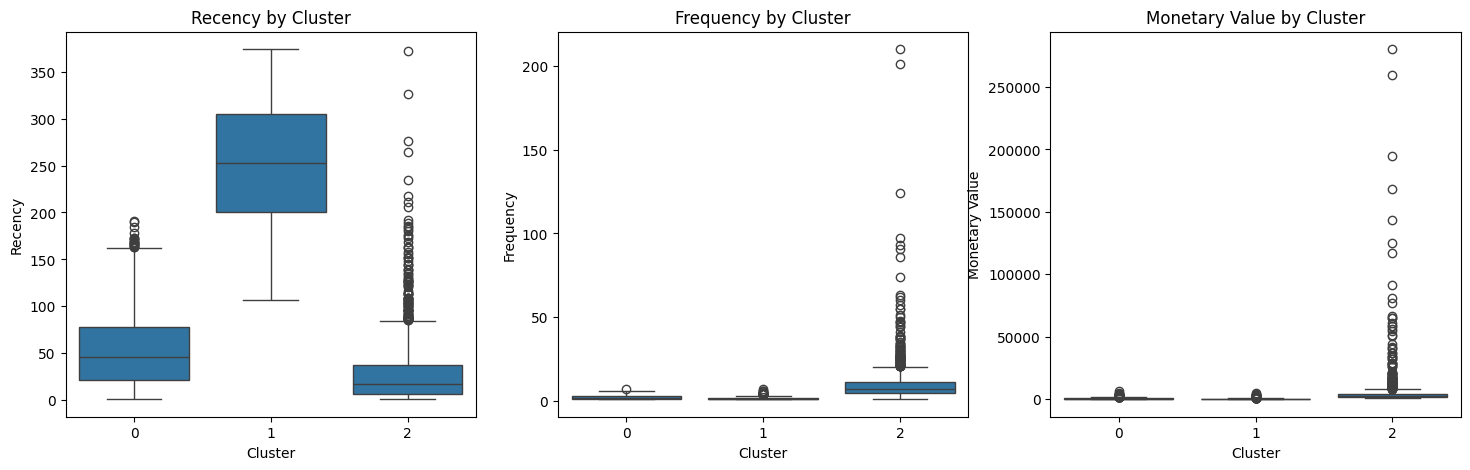

In [11]:
#BOXPLOT PER FEATURE AND CLUSTER
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='Cluster', y='Recency', data=df, ax=axes[0])
axes[0].set_title("Recency by Cluster")

sns.boxplot(x='Cluster', y='Frequency', data=df, ax=axes[1])
axes[1].set_title("Frequency by Cluster")

sns.boxplot(x='Cluster', y='Monetary Value', data=df, ax=axes[2])
axes[2].set_title("Monetary Value by Cluster")

plt.show()
